#Imports & Setup

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
sns.set(style="whitegrid")


#Load Dataset

In [17]:

# Download latest version
path = "/workspaces/Diabetes-Prediction-Model/diabetes_prediction_dataset.csv"

print(path)

/workspaces/Diabetes-Prediction-Model/diabetes_prediction_dataset.csv


In [18]:
df = pd.read_csv("/workspaces/Diabetes-Prediction-Model/diabetes_prediction_dataset.csv")

In [19]:
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


#Dataset Overview

In [20]:
print("Dataset shape:", df.shape)

Dataset shape: (100000, 9)


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [22]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


#Target Variable Analysis

In [23]:


target_counts = df["diabetes"].value_counts()
target_percent = df["diabetes"].value_counts(normalize=True) * 100

pd.DataFrame({
    "count": target_counts,
    "percentage": target_percent.round(2)
})


,count,percentage
diabetes,,
0,91500,91.5
1,8500,8.5


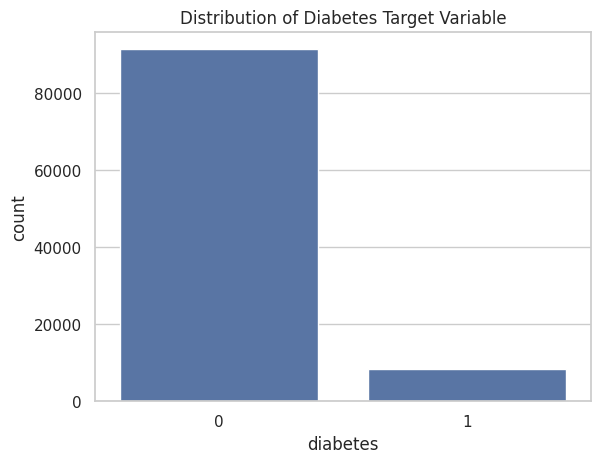

In [24]:
sns.countplot(x="diabetes", data=df)
plt.title("Distribution of Diabetes Target Variable")
plt.show()


#Numerical Feature Analysis

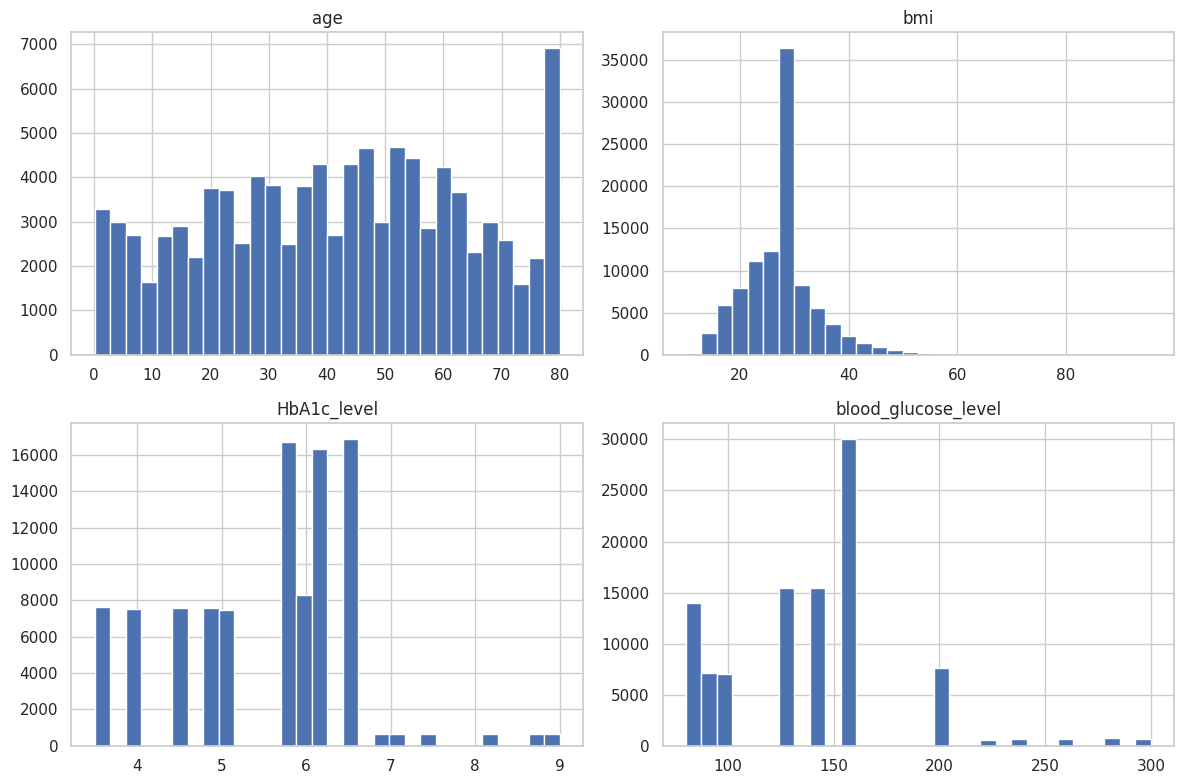

In [25]:
#Numerical Feature Analysis

numerical_features = [
    "age",
    "bmi",
    "HbA1c_level",
    "blood_glucose_level"
]

df[numerical_features].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

#Categorical Feature Analysis

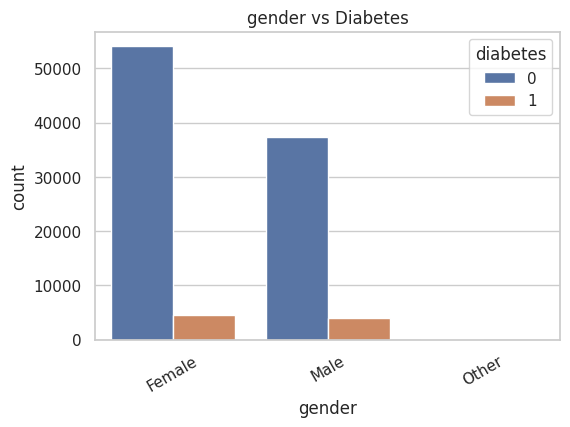

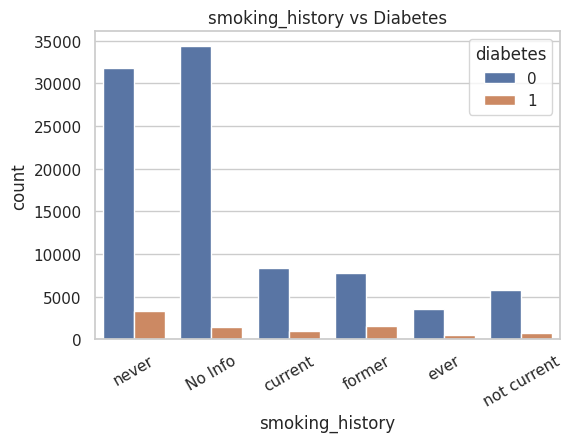

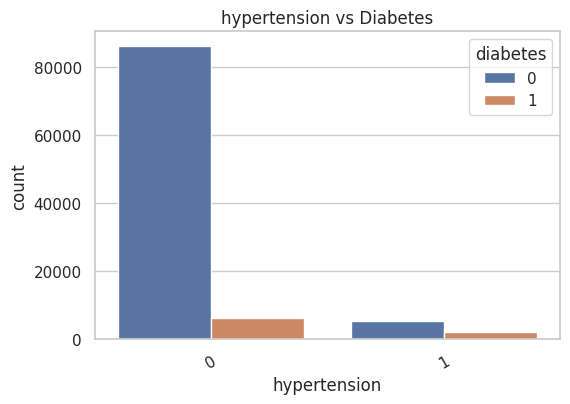

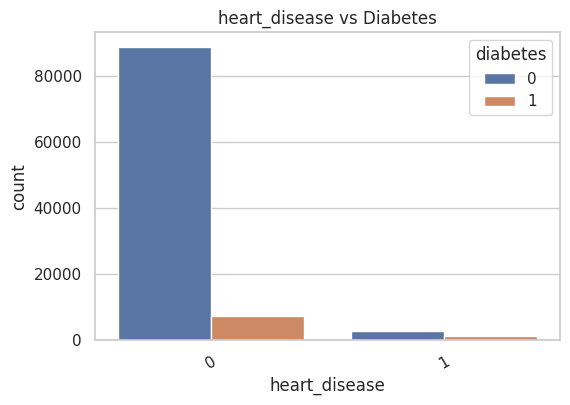

In [26]:

categorical_features = [
    "gender",
    "smoking_history",
    "hypertension",
    "heart_disease"
]

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="diabetes", data=df)
    plt.title(f"{col} vs Diabetes")
    plt.xticks(rotation=30)
    plt.show()


#Correlation Analysis

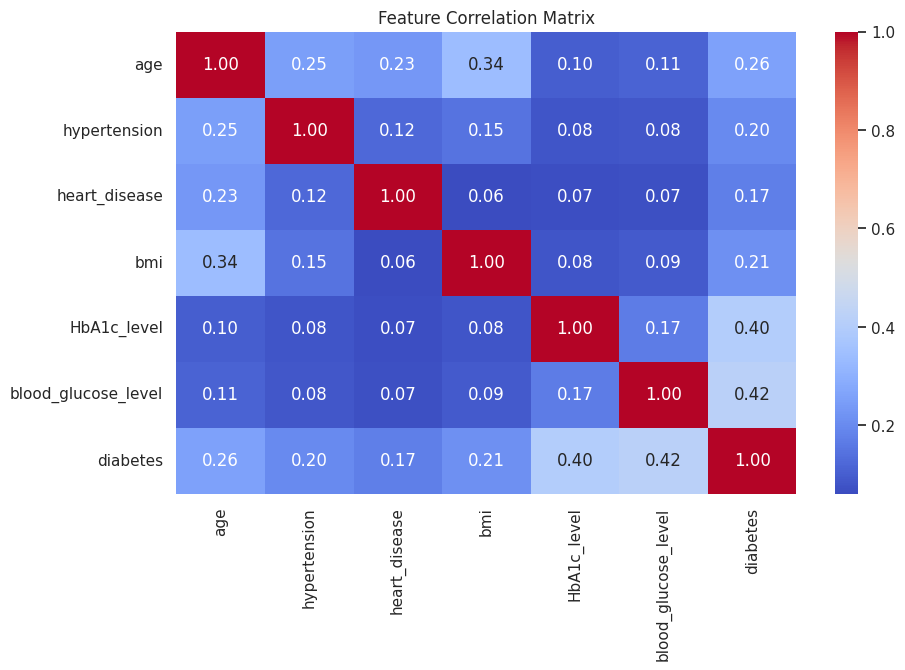

In [27]:

plt.figure(figsize=(10,6))
# Select only numerical columns for correlation calculation
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

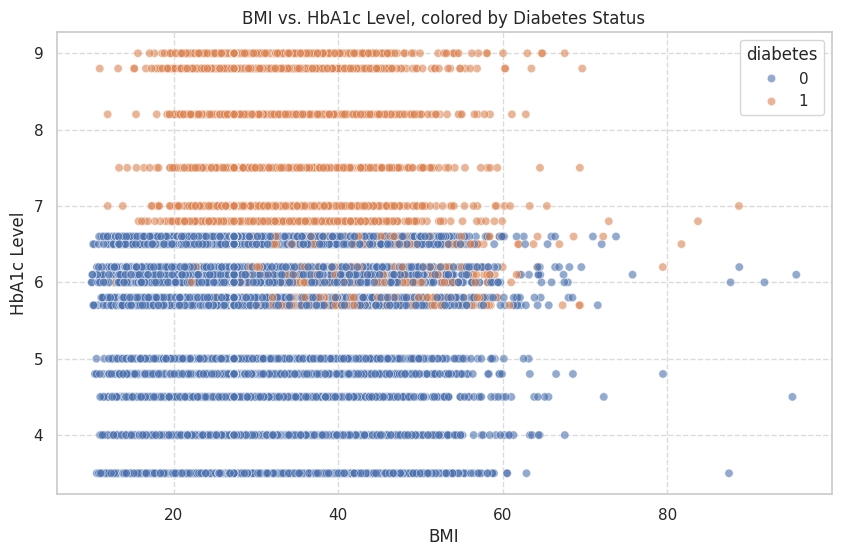

In [28]:
#relationship between `bmi` and `HbA1c_level`
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='HbA1c_level', hue='diabetes', data=df, alpha=0.6)
plt.title('BMI vs. HbA1c Level, colored by Diabetes Status')
plt.xlabel('BMI')
plt.ylabel('HbA1c Level')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#Feature Importance (Tree-Based Model)


Encoding categorical features

In [29]:

df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop("diabetes", axis=1)
y = df_encoded["diabetes"]


Train Random Forest for feature importance

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X, y)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

Plot Feature Importance

In [31]:
feature_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)

feature_importance.head(10)


,feature,importance
4,HbA1c_level,0.397587
5,blood_glucose_level,0.331706
3,bmi,0.123103
0,age,0.099745
1,hypertension,0.014350
2,heart_disease,0.010048
6,gender_Male,0.006087
11,smoking_history_never,0.004621
10,smoking_history_former,0.004144
8,smoking_history_current,0.003231


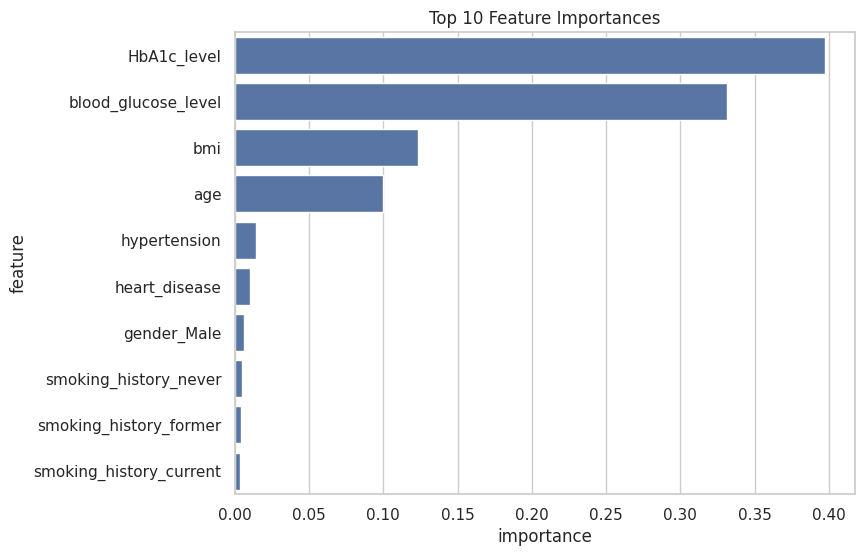

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(
    x="importance",
    y="feature",
    data=feature_importance.head(10)
)
plt.title("Top 10 Feature Importances")
plt.show()


### Feature Importance Analysis

The feature importance analysis reveals that **HbA1c level** is the most influential predictor of diabetes, followed closely by **blood glucose level**. These two features dominate the model’s decision-making process, which is consistent with clinical practice, as both measurements are primary diagnostic indicators of diabetes.

**Body Mass Index (BMI)** and **age** show moderate importance, indicating that demographic and lifestyle-related factors contribute meaningfully to diabetes risk, although their influence is secondary to direct biochemical markers.

Features such as **hypertension** and **heart disease** have lower but non-zero importance, suggesting that comorbid conditions associated with metabolic health increase diabetes risk indirectly.

Categorical variables including **gender** and **smoking history** exhibit relatively low importance, implying that their predictive value is limited when stronger medical indicators are available.

Overall, the results confirm that the model prioritizes clinically relevant features, improving interpretability and aligning well with established medical knowledge. These insights informed the final model selection and feature preprocessing strategy.

